In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
#import seaborn as sns
#from scipy.stats import chi2_contingency

In [40]:
excel = pd.ExcelFile('https://docs.google.com/spreadsheets/d/1ecopK6oyyb4d_7-QLrCr8YlgFrCetHU7-VQfnYej7JY/export/format=xlsx')

# Data wrangling

In [41]:
# importing all sheets
dfs = [excel.parse(sheet_name).assign(sheet_name = sheet_name)
       for sheet_name in excel.sheet_names
]

# concatenate all dfs into a signle df
df = pd.concat(dfs, ignore_index = True)

# splitting sheet_names into City and Weekend columns
df[['City', 'Weekend']] = df['sheet_name'].str.split('_', expand=True)

#Converting Weekend into a boolean var.
df['is_weekend'] = df['Weekend'].map({'weekends': True, 'weekdays': False})


# creating one column for number of listings a host has
df['number_listings'] = np.select(
    [
        df['multi'] == 1,
        df['biz'] == 1
    ],
    [
        '2 - 4',
        '> 4'
    ],
    default = '1' # if both conditions are not met, return 1
)

# dropping unecessary columns 
df.drop(columns = ['Unnamed: 0', 'multi', 'biz', 'sheet_name', 'Weekend'], inplace = True) # drop

# rename realSum to Price
df.rename(columns = {'realSum': 'Price [€]'}, inplace = True)

print(f'Dimensions of the Dataset: {df.shape}')
df.head()

Dimensions of the Dataset: (51707, 20)


,Price [€],room_type,room_shared,room_private,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,is_weekend,number_listings
0,194.033698,Private room,False,True,2,False,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,False,2 - 4
1,344.245776,Private room,False,True,4,False,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,False,1
2,264.101422,Private room,False,True,2,False,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,False,> 4
3,433.529398,Private room,False,True,4,False,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,False,> 4
4,485.552926,Private room,False,True,2,True,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,False,1


### addding the County

In [42]:
# which citys do we have
print(df['City'].unique())

['amsterdam' 'athens' 'berlin' 'barcelona' 'budapest' 'lisbon' 'london'
 'paris' 'rome' 'vienna']


In [43]:
# initiating city - country map
city_to_country = {
    'amsterdam': 'netherlands',
    'athens': 'greece',
    'berlin': 'germany',
    'barcelona': 'spain',
    'budapest': 'hungary',
    'lisbon': 'portugal',
    'london': 'united kingdom',
    'paris': 'france',
    'rome': 'italy',
    'vienna': 'austria'
}

# mapping each City to their respective Country
df['Country'] = df['City'].map(city_to_country)

df.head()

,Price [€],room_type,room_shared,room_private,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,...,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,is_weekend,number_listings,Country
0,194.033698,Private room,False,True,2,False,10,93,1,5.022964,...,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,False,2 - 4,netherlands
1,344.245776,Private room,False,True,4,False,8,85,1,0.488389,...,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,False,1,netherlands
2,264.101422,Private room,False,True,2,False,9,87,1,5.748312,...,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,False,> 4,netherlands
3,433.529398,Private room,False,True,4,False,9,90,2,0.384862,...,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,False,> 4,netherlands
4,485.552926,Private room,False,True,2,True,10,98,1,0.544738,...,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,False,1,netherlands


## Columns into a new order

In [44]:
print(df.columns.tolist())

['Price [€]', 'room_type', 'room_shared', 'room_private', 'person_capacity', 'host_is_superhost', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat', 'City', 'is_weekend', 'number_listings', 'Country']


In [45]:
new_oder = ['Price [€]', # price
    'host_is_superhost', 'number_listings', # host attributes
    'cleanliness_rating', 'guest_satisfaction_overall', # ratings
    'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', # more ratings
    'room_type', 'room_shared', 'room_private', 'person_capacity', 'bedrooms', # accomodation features
    'dist', 'metro_dist', # characteristics of location
    'lng', 'lat', 'City', 'Country', # location more borad
    'is_weekend'] # time

df = df[new_oder]

# Initial Inspection

In [46]:
print(f'Dimensions of the Dataset: {df.shape}')
df.head()

Dimensions of the Dataset: (51707, 21)


,Price [€],host_is_superhost,number_listings,cleanliness_rating,guest_satisfaction_overall,attr_index,attr_index_norm,rest_index,rest_index_norm,room_type,...,room_private,person_capacity,bedrooms,dist,metro_dist,lng,lat,City,Country,is_weekend
0,194.033698,False,2 - 4,10,93,78.690379,4.166708,98.253896,6.846473,Private room,...,True,2,1,5.022964,2.539380,4.90569,52.41772,amsterdam,netherlands,False
1,344.245776,False,1,8,85,631.176378,33.421209,837.280757,58.342928,Private room,...,True,4,1,0.488389,0.239404,4.90005,52.37432,amsterdam,netherlands,False
2,264.101422,False,> 4,9,87,75.275877,3.985908,95.386955,6.646700,Private room,...,True,2,1,5.748312,3.651621,4.97512,52.36103,amsterdam,netherlands,False
3,433.529398,False,> 4,9,90,493.272534,26.119108,875.033098,60.973565,Private room,...,True,4,2,0.384862,0.439876,4.89417,52.37663,amsterdam,netherlands,False
4,485.552926,True,1,10,98,552.830324,29.272733,815.305740,56.811677,Private room,...,True,2,1,0.544738,0.318693,4.90051,52.37508,amsterdam,netherlands,False


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price [€]                   51707 non-null  float64
 1   host_is_superhost           51707 non-null  bool   
 2   number_listings             51707 non-null  object 
 3   cleanliness_rating          51707 non-null  int64  
 4   guest_satisfaction_overall  51707 non-null  int64  
 5   attr_index                  51707 non-null  float64
 6   attr_index_norm             51707 non-null  float64
 7   rest_index                  51707 non-null  float64
 8   rest_index_norm             51707 non-null  float64
 9   room_type                   51707 non-null  object 
 10  room_shared                 51707 non-null  bool   
 11  room_private                51707 non-null  bool   
 12  person_capacity             51707 non-null  int64  
 13  bedrooms                    517

In [48]:
df.describe()

,Price [€],cleanliness_rating,guest_satisfaction_overall,attr_index,attr_index_norm,rest_index,rest_index_norm,person_capacity,bedrooms,dist,metro_dist,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,9.390624,92.628232,294.204105,13.423792,626.856696,22.786177,3.161661,1.15876,3.191285,0.681540,7.426068,45.671128
std,327.948386,0.954868,8.945531,224.754123,9.807985,497.920226,17.804096,1.298545,0.62741,2.393803,0.858023,9.799725,5.249263
min,34.779339,2.000000,20.000000,15.152201,0.926301,19.576924,0.592757,2.000000,0.00000,0.015045,0.002301,-9.226340,37.953000
25%,148.752174,9.000000,90.000000,136.797385,6.380926,250.854114,8.751480,2.000000,1.00000,1.453142,0.248480,-0.072500,41.399510
50%,211.343089,10.000000,95.000000,234.331748,11.468305,522.052783,17.542238,3.000000,1.00000,2.613538,0.413269,4.873000,47.506690
75%,319.694287,10.000000,99.000000,385.756381,17.415082,832.628988,32.964603,4.000000,1.00000,4.263077,0.737840,13.518825,51.471885
max,18545.450285,10.000000,100.000000,4513.563486,100.000000,6696.156772,100.000000,6.000000,10.00000,25.284557,14.273577,23.786020,52.641410


In [49]:
#checking for duplicates
dublicates_check = df.duplicated()
print(dublicates_check.unique())
# --> no observations are 100% duplicates

[False]


# Exploratory Questions


2. Which city has the biggest proportion of superhosts?
3. Which cities have listings with more than four rooms?
4. Which city has the most entire home/apt type listings?
5. Are ratings typically high across listings, or is there a wide variation?
6. How does person_capacity vary across listings? What is the most common capacity of listings?
7. Plot the distribution of realSum for both weekday and weekend offers. Is it normally distributed, skewed, or multimodal? If skewed, consider using transformations (e.g., log transformation) to normalize it.
8. Plot the distribution of guest_satisfaction_overall ratings. 
9. Examine the distribution of cleanliness_rating.

### 1. How many listings are in each city in total and also per type of day?

In [50]:
# Number of listing in each city
listings_per_city = df.groupby('City').size().reset_index(name = 'Count')
print(listings_per_city)

        City  Count
0  amsterdam   2080
1     athens   5280
2  barcelona   2833
3     berlin   2484
4   budapest   4022
5     lisbon   5763
6     london   9993
7      paris   6688
8       rome   9027
9     vienna   3537


In [51]:
# Number of listings in each city & type of day (Weekend/Weekdays)
listings_per_city_per_day = df.groupby(['City', 'is_weekend']).size().reset_index(name = 'Count')
print(listings_per_city_per_day)

         City  is_weekend  Count
0   amsterdam       False   1103
1   amsterdam        True    977
2      athens       False   2653
3      athens        True   2627
4   barcelona       False   1555
5   barcelona        True   1278
6      berlin       False   1284
7      berlin        True   1200
8    budapest       False   2074
9    budapest        True   1948
10     lisbon       False   2857
11     lisbon        True   2906
12     london       False   4614
13     london        True   5379
14      paris       False   3130
15      paris        True   3558
16       rome       False   4492
17       rome        True   4535
18     vienna       False   1738
19     vienna        True   1799


In [52]:
# reshape to easily plot
number_listings = listings_per_city_per_day.pivot(index='City', columns='is_weekend', values='Count').fillna(0)

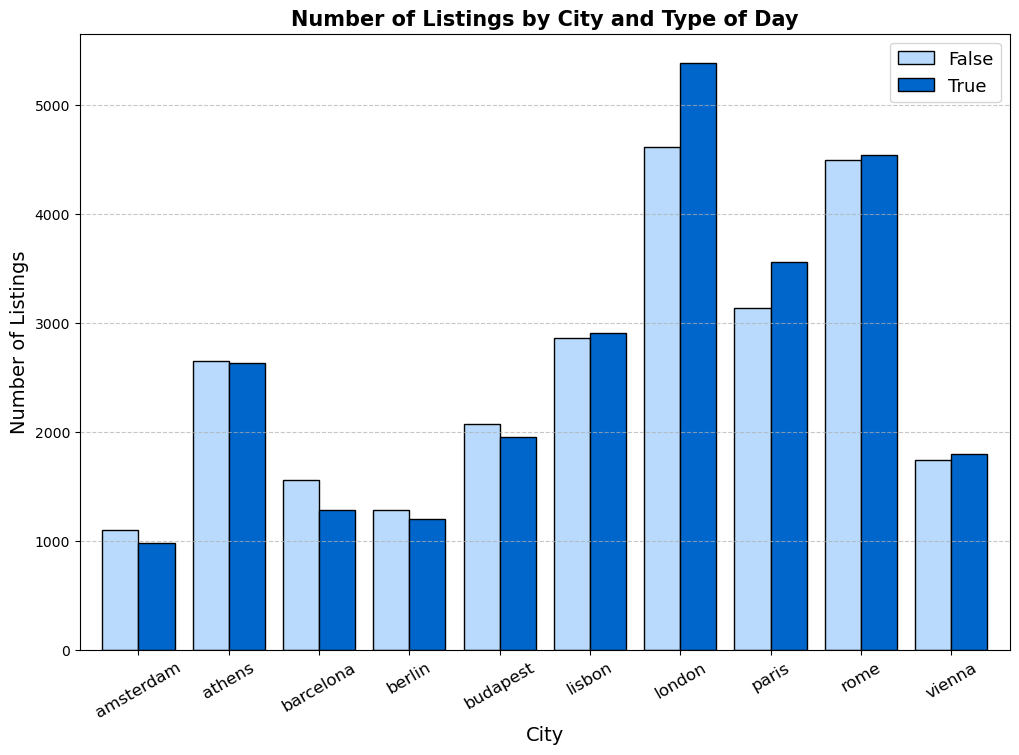

In [53]:
# plotting
number_listings.plot(kind = 'bar', stacked = False, color = ['#B9DAFC', '#0066CC'], figsize = (12, 8), edgecolor = 'black', width = 0.8)
plt.title('Number of Listings by City and Type of Day', fontsize = 15, fontweight='bold')
plt.xlabel('City', fontsize = 14)
plt.ylabel('Number of Listings', fontsize = 14)
plt.legend(title='Day Type')
plt.xticks(rotation=30, fontsize = 12)
plt.legend(title = '', fontsize = 13, loc = 'upper right', frameon = True)
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.8, alpha = 0.7)
plt.show()

### Is there a difference in price between two cities? Choose at least three pairs of cities during weekdays.

In [54]:
# weekdays only df
df_weekdays = df[df['is_weekend'] == False]
print(df['City'].unique())

# choosing cities to pair based on roughly equal quantity
city_pairs = [('london', 'rome'), ('athens', 'lisbon'), ('athens', 'paris'), ('lisbon', 'paris'), ('london', 'paris')]

['amsterdam' 'athens' 'berlin' 'barcelona' 'budapest' 'lisbon' 'london'
 'paris' 'rome' 'vienna']


In [55]:
# t-tests for each city pair
for city1, city2 in city_pairs:
    prices_city1 = df_weekdays[df_weekdays['City'] == city1]['Price [€]']
    prices_city2 = df_weekdays[df_weekdays['City'] == city2]['Price [€]']
    t_stat, p_value = ttest_ind(prices_city1, prices_city2, nan_policy='omit') 
    
    print(f't-test between {city1} & {city2}:')
    print(f't-statistic: {t_stat:.3f}, p-value: {p_value:.3f}')
    print('Significant difference' if p_value < 0.05 else 'No significant difference')
    print('-' * 40)

t-test between london & rome:
t-statistic: 20.408, p-value: 0.000
Significant difference
----------------------------------------
t-test between athens & lisbon:
t-statistic: -11.218, p-value: 0.000
Significant difference
----------------------------------------
t-test between athens & paris:
t-statistic: -24.035, p-value: 0.000
Significant difference
----------------------------------------
t-test between lisbon & paris:
t-statistic: -21.193, p-value: 0.000
Significant difference
----------------------------------------
t-test between london & paris:
t-statistic: -3.573, p-value: 0.000
Significant difference
----------------------------------------


### Does the price tend to be higher on weekends?

In [56]:
price_weekends = df[df['is_weekend'] == True]['Price [€]']
price_weekdays = df[df['is_weekend'] == False]['Price [€]']
t_stat, p_value = ttest_ind(price_weekends, price_weekdays, nan_policy='omit') 

# Print the results
print(f"t-test between weekends and weekdays:")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

t-test between weekends and weekdays:
t-statistic: 2.871, p-value: 0.004


In [57]:
# conclusion the weekends tend to be more expensive (barely sig.)

In [58]:
# Just looking at the chosen cities individually of city_pairs:
city_chosen = ('paris', 'london', 'rome', 'athens', 'lisbon')
results = []
# t-tests for each city pair
for city in city_chosen:
    price_weekends = df[(df['is_weekend'] == True) & (df['City'] == city)]['Price [€]']
    price_weekdays = df[(df['is_weekend'] == False) & (df['City'] == city)]['Price [€]']
    t_stat, p_value = ttest_ind(price_weekends, price_weekdays, nan_policy='omit') 

    results.append({
        'City': city,
        't-statistic': t_stat,
        'p-value': p_value,
        'Higher Price': 'Weekend' if t_stat > 0 else 'Weekday' if t_stat < 0 else 'Same',
        'Significant Difference': p_value < 0.05
    })

results_df_week = pd.DataFrame(results)
                      
results_df_week

,City,t-statistic,p-value,Higher Price,Significant Difference
0,paris,-1.449898,0.147134,Weekday,False
1,london,0.439749,0.660129,Weekend,False
2,rome,3.009787,0.002622,Weekend,True
3,athens,-1.132348,0.257539,Weekday,False
4,lisbon,1.288311,0.197690,Weekend,False


In [59]:
# only in rome a sig. difference visible

### Are listings of superhosts more expensive than those of normal hosts?

In [60]:
price_super_hosts = df[df['host_is_superhost'] == True]['Price [€]']
price_normal_hosts = df[df['host_is_superhost'] == False]['Price [€]']
t_stat, p_value = ttest_ind(price_super_hosts, price_normal_hosts, nan_policy='omit') 

# Print the results
print(f"t-test between superhosts and normal hosts:")
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

t-test between superhosts and normal hosts:
t-statistic: -10.352, p-value: 0.000


In [61]:
#results show that superhosts are cheaper

In [62]:
# Just looking at the chosen cities individually of city_pairs:
city_chosen = ('paris', 'london', 'rome', 'athens', 'lisbon')
results = []
# t-tests for each city pair
for city in city_chosen:
    price_super_hosts = df[(df['host_is_superhost'] == True) & (df['City'] == city)]['Price [€]']
    price_normal_hosts = df[(df['host_is_superhost'] == False) & (df['City'] == city)]['Price [€]']
    t_stat, p_value = ttest_ind(price_super_hosts, price_normal_hosts, nan_policy='omit') 

    results.append({
        'City': city,
        't-statistic': t_stat,
        'p-value': p_value,
        'Higher Price': 'Superhosts' if t_stat > 0 else 'Normal Hosts' if t_stat < 0 else 'Same',
        'Significant Difference': p_value < 0.05
    })

results_df_hosts = pd.DataFrame(results)
                      
results_df_hosts

,City,t-statistic,p-value,Higher Price,Significant Difference
0,paris,1.845869,6.495535e-02,Superhosts,False
1,london,-1.427622,1.534319e-01,Normal Hosts,False
2,rome,3.259386,1.120673e-03,Superhosts,True
3,athens,2.797846,5.163107e-03,Superhosts,True
4,lisbon,5.630217,1.884845e-08,Superhosts,True


In [63]:
# in "cheaper" cities, superhosts seem to charge a surplus

### Are superhosts closer to the city center and metro station than normal hosts?

to be coniued
--> note: Check for above code distribution!

if not normally distributed: Man Wittney U test instead of simple t test!

further questions

5. Are superhosts cleaner than normal hosts?
6. Is there a pattern between room types and superhost status?
7. Is it more expensive to rent an entire home/apt than a private room? Does that depend on the city?